# Exploring Top 10 Non-Google Domains

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import glob

from datetime import datetime

%matplotlib inline

In [83]:
paths = glob.glob('../data/external/alexa1m-rankings-top-100-part-*')
column_names = ['domain', 'alexa_rank', 'rank', 'date']
df = pd.concat((pd.read_csv(path, names=column_names) for path in paths))

In [84]:
df['date'] = df['date'].apply(lambda val: datetime.strptime(str(val), '%Y%m%d')).astype('O')

In [85]:
df.head()

,domain,alexa_rank,rank,date
0,facebook.com,2,1,2016-01-15 00:00:00
1,youtube.com,3,2,2016-01-15 00:00:00
2,baidu.com,4,3,2016-01-15 00:00:00
3,yahoo.com,5,4,2016-01-15 00:00:00
4,amazon.com,6,5,2016-01-15 00:00:00


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68175 entries, 0 to 34036
Data columns (total 4 columns):
domain        68175 non-null object
alexa_rank    68175 non-null int64
rank          68175 non-null int64
date          68175 non-null object
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


array(['facebook.com', 'youtube.com', 'baidu.com', 'yahoo.com',
       'amazon.com', 'wikipedia.org', 'qq.com', 'twitter.com', 'live.com',
       'taobao.com'], dtype=object)

In [139]:
def draw_plot(df, domains):
    fig, ax = plt.subplots(figsize=(20, 15))

    date_col = df['date']

    for domain in domains:
        filtered_df = df[(df['domain'] == domain)]
        ax.plot(filtered_df['date'], filtered_df['alexa_rank'], label=domain)

    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    weeks = mdates.WeekdayLocator() # every week
    yearsFmt = mdates.DateFormatter('%Y')
    monthsFmt = mdates.DateFormatter('%Y-%m')

    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsFmt)
    ax.xaxis.set_minor_locator(weeks)


    datemin = datetime(date_col.min().year, 1, 1)
    datemax = datetime(date_col.max().year + 1, 1, 1)
    #ax.set_xlim(datemin, datemax)

    ax.grid(True)
    ax.legend(loc=0) 

    ax.set_ylabel('Alexa Rank')
    ax.set_xlabel('Time')
    ax.invert_yaxis()


    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()

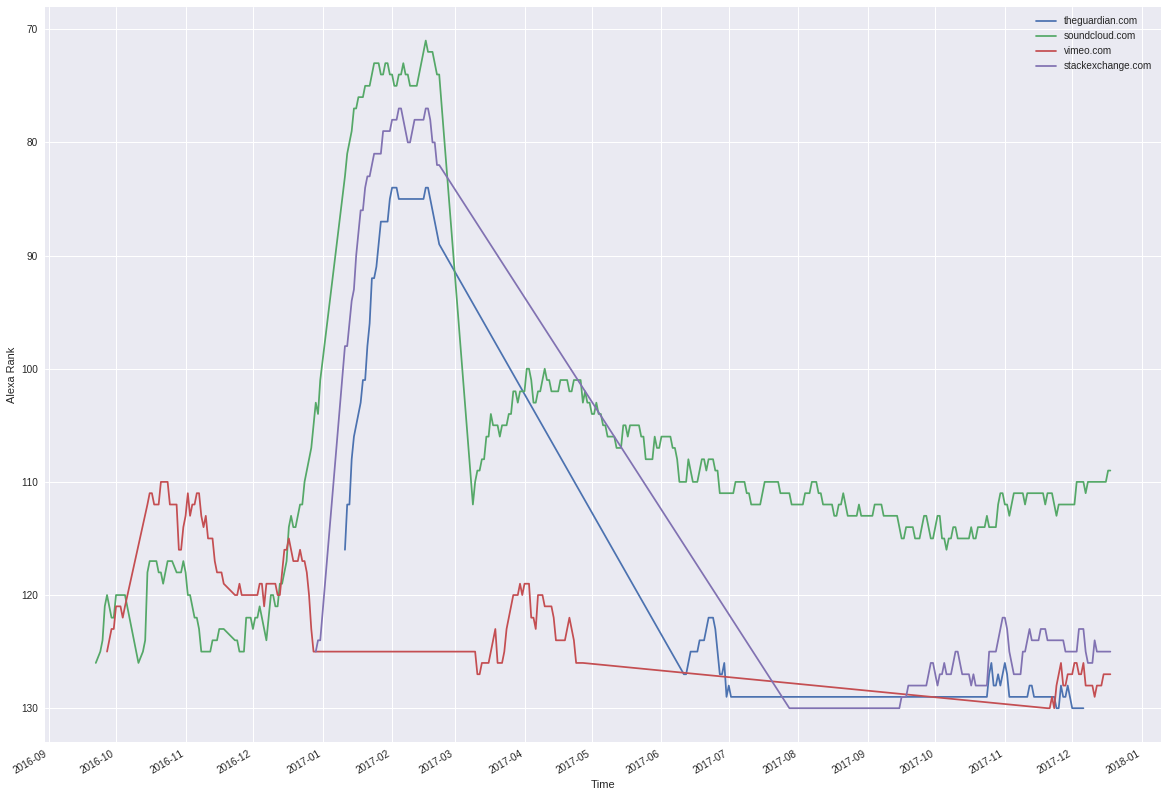

In [140]:
domains = ['theguardian.com', 'soundcloud.com', 'vimeo.com', 'stackexchange.com']
draw_plot(df, domains)

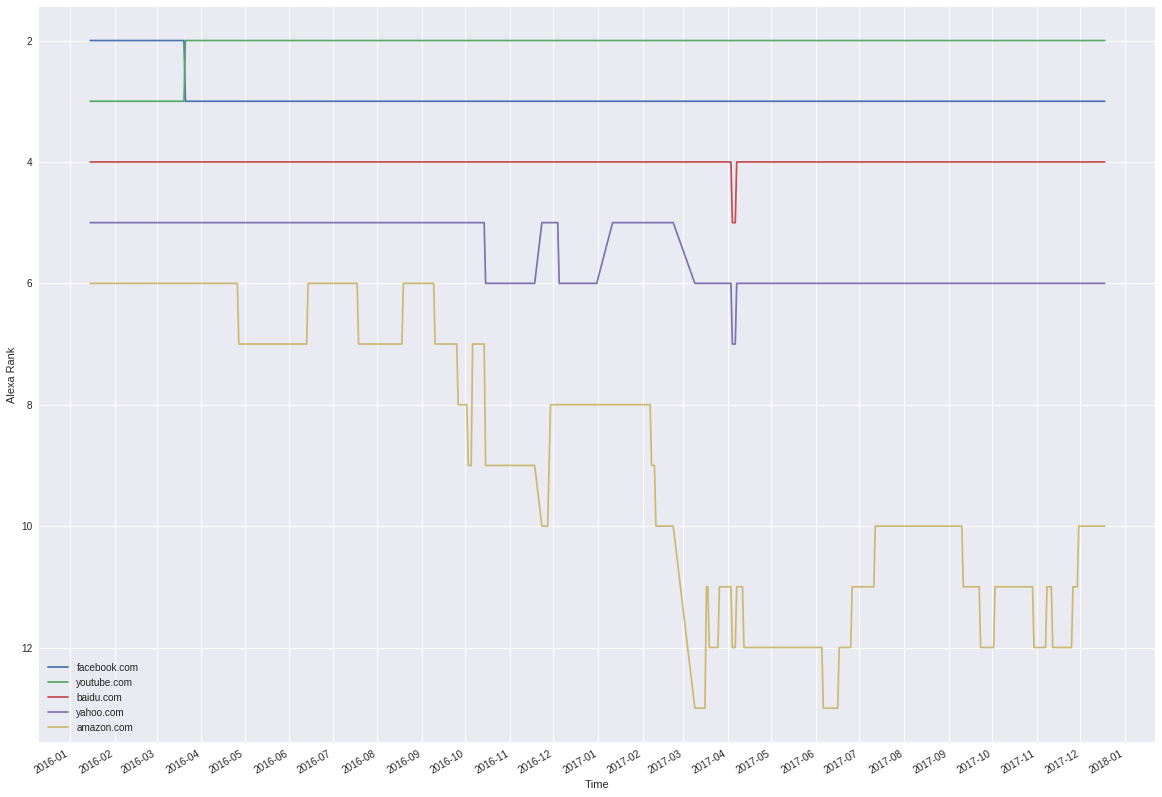

In [141]:
top_domains_first_day = df[df['date'] == df['date'].min()]['domain'].unique()
domains = top_domains_first_day[:5]
draw_plot(df, domains)

In [131]:
df[df['date'] == df['date'].min()]['domain'].unique()

array(['facebook.com', 'youtube.com', 'baidu.com', 'yahoo.com',
       'amazon.com', 'wikipedia.org', 'qq.com', 'twitter.com', 'live.com',
       'taobao.com', 'sina.com.cn', 'yahoo.co.jp', 'weibo.com', 'msn.com',
       'bing.com', 'vk.com', 'linkedin.com', 'yandex.ru', 'hao123.com',
       'ebay.com', 'amazon.co.jp', 'instagram.com', 'mail.ru', 't.co',
       'pinterest.com', 'tmall.com', 'reddit.com', 'netflix.com',
       'paypal.com', 'sohu.com', '360.cn', 'microsoft.com', 'gmw.cn',
       'tumblr.com', 'wordpress.com', 'imgur.com', 'blogspot.com',
       'imdb.com', 'apple.com', 'ask.com', 'aliexpress.com',
       'onclickads.net', 'xvideos.com', 'ok.ru', 'amazon.de', 'fc2.com',
       'tianya.cn', 'diply.com', 'alibaba.com', 'bongacams.com',
       'amazon.co.uk', 'stackoverflow.com', 'rakuten.co.jp', 'pornhub.com',
       'naver.com', 'soso.com', 'go.com', 'xinhuanet.com', 'blogger.com',
       'craigslist.org', 'amazon.in', 'kat.cr', 'nicovideo.jp', 'cntv.cn',
       'outbrain

In [132]:
df['domain'].unique()

array(['facebook.com', 'youtube.com', 'baidu.com', 'yahoo.com',
       'amazon.com', 'wikipedia.org', 'qq.com', 'twitter.com', 'live.com',
       'taobao.com', 'sina.com.cn', 'yahoo.co.jp', 'weibo.com', 'msn.com',
       'bing.com', 'vk.com', 'linkedin.com', 'yandex.ru', 'hao123.com',
       'ebay.com', 'amazon.co.jp', 'instagram.com', 'mail.ru', 't.co',
       'pinterest.com', 'tmall.com', 'reddit.com', 'netflix.com',
       'paypal.com', 'sohu.com', '360.cn', 'microsoft.com', 'gmw.cn',
       'tumblr.com', 'wordpress.com', 'imgur.com', 'blogspot.com',
       'imdb.com', 'apple.com', 'ask.com', 'aliexpress.com',
       'onclickads.net', 'xvideos.com', 'ok.ru', 'amazon.de', 'fc2.com',
       'tianya.cn', 'diply.com', 'alibaba.com', 'bongacams.com',
       'amazon.co.uk', 'stackoverflow.com', 'rakuten.co.jp', 'pornhub.com',
       'naver.com', 'soso.com', 'go.com', 'xinhuanet.com', 'blogger.com',
       'craigslist.org', 'amazon.in', 'kat.cr', 'nicovideo.jp', 'cntv.cn',
       'outbrain

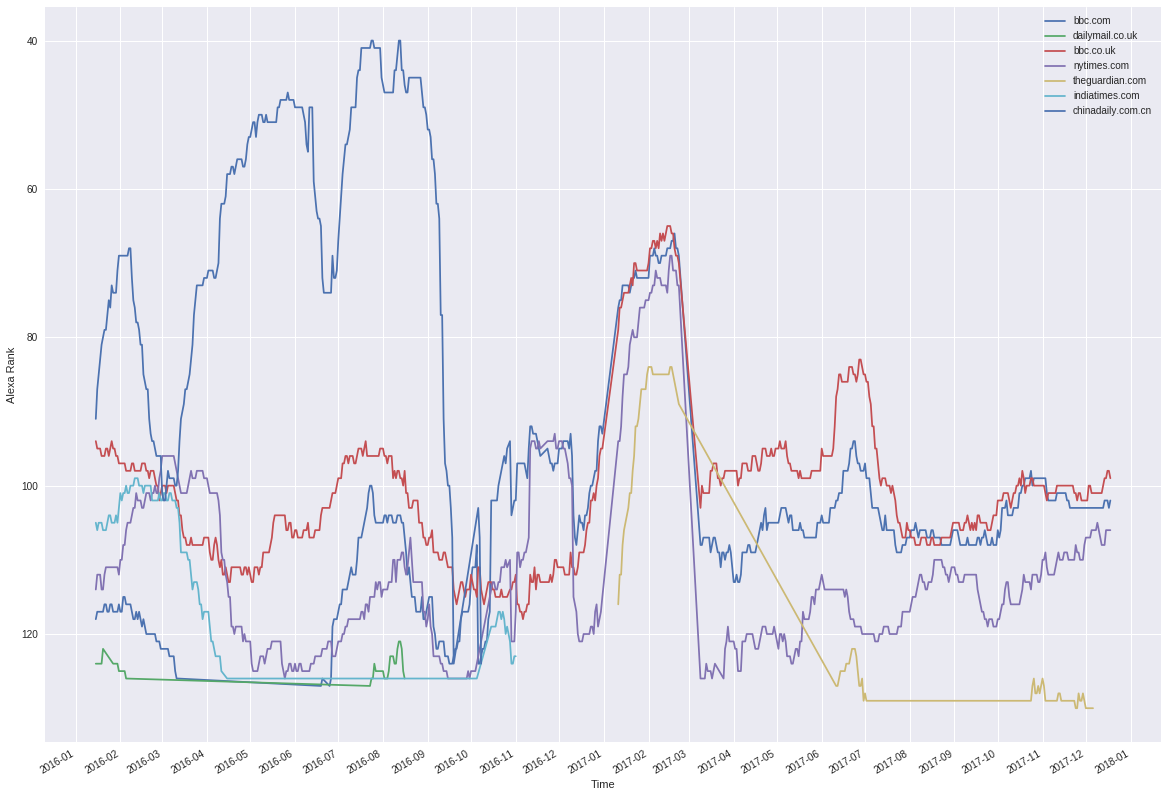

In [142]:
domains = ['bbc.com', 'dailymail.co.uk', 'bbc.co.uk', 'nytimes.com', 'theguardian.com', 'indiatimes.com', 'chinadaily.com.cn']
draw_plot(df, domains)

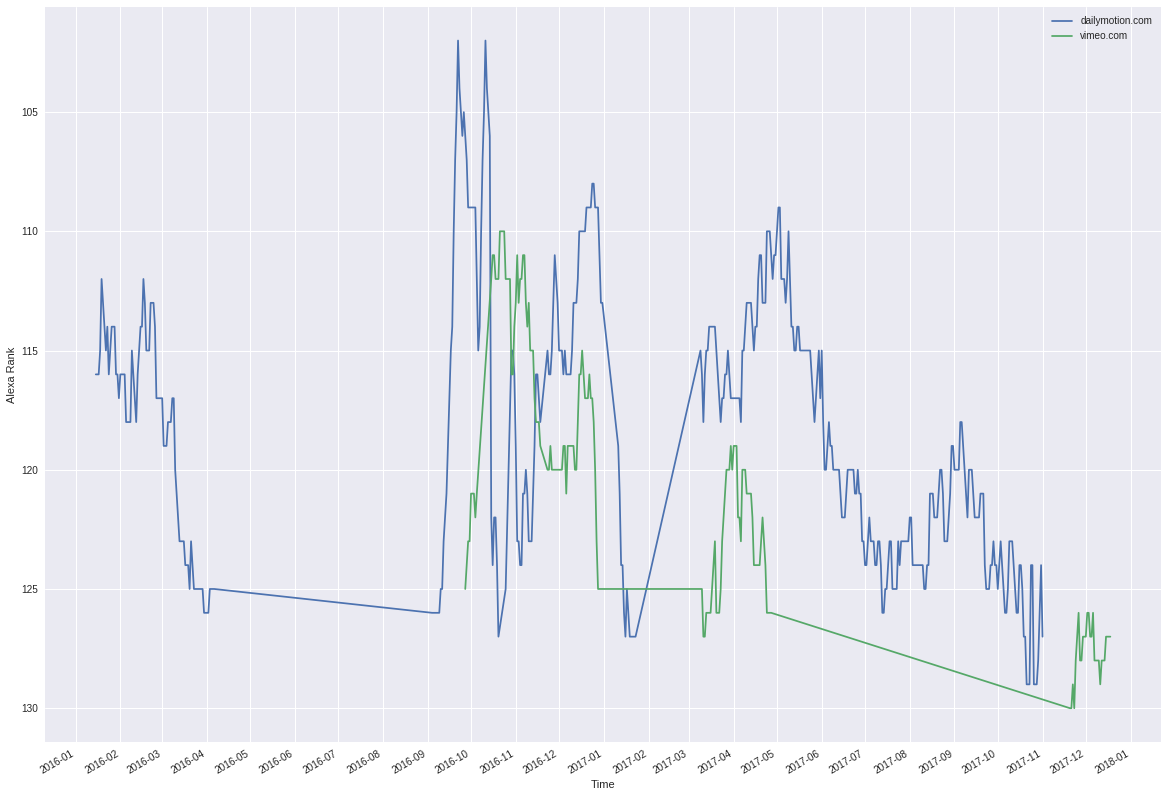

In [144]:
domains = ['dailymotion.com', 'vimeo.com']
draw_plot(df, domains)